Quais os bairros mais caros?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [2]:
path = kagglehub.dataset_download("arianazmoudeh/airbnbopendata")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airbnbopendata


In [3]:
path

'/kaggle/input/airbnbopendata'

In [4]:
df = pd.read_csv(f'{path}/Airbnb_Open_Data.csv', low_memory=False)

In [5]:
colunas = {
    'id': 'id',
    'NAME': 'nome_anuncio',
    'host id': 'id_anfitriao',
    'host_identity_verified': 'identidade_verificada_anfitriao',
    'host name': 'nome_anfitriao',
    'neighbourhood group': 'regiao',
    'neighbourhood': 'bairro',
    'lat': 'latitude',
    'long': 'longitude',
    'country': 'pais',
    'country code': 'codigo_pais',
    'instant_bookable': 'reserva_instantanea',
    'cancellation_policy': 'politica_cancelamento',
    'room type': 'tipo_quarto',
    'Construction year': 'ano_construcao',
    'price': 'preco',
    'service fee': 'taxa_servico',
    'minimum nights': 'minimo_noites',
    'number of reviews': 'numero_avaliacoes',
    'last review': 'data_ultima_avaliacao',
    'reviews per month': 'avaliacoes_por_mes',
    'review rate number': 'nota_avaliacao',
    'calculated host listings count': 'contagem_anuncios_anfitriao',
    'availability 365': 'disponibilidade_365d',
    'house_rules': 'regras_casa',
    'license': 'licenca'
}

df.rename(columns=colunas, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               102599 non-null  int64  
 1   nome_anuncio                     102349 non-null  object 
 2   id_anfitriao                     102599 non-null  int64  
 3   identidade_verificada_anfitriao  102310 non-null  object 
 4   nome_anfitriao                   102193 non-null  object 
 5   regiao                           102570 non-null  object 
 6   bairro                           102583 non-null  object 
 7   latitude                         102591 non-null  float64
 8   longitude                        102591 non-null  float64
 9   pais                             102067 non-null  object 
 10  codigo_pais                      102468 non-null  object 
 11  reserva_instantanea              102494 non-null  object 
 12  po

In [7]:
df.columns

Index(['id', 'nome_anuncio', 'id_anfitriao', 'identidade_verificada_anfitriao',
       'nome_anfitriao', 'regiao', 'bairro', 'latitude', 'longitude', 'pais',
       'codigo_pais', 'reserva_instantanea', 'politica_cancelamento',
       'tipo_quarto', 'ano_construcao', 'preco', 'taxa_servico',
       'minimo_noites', 'numero_avaliacoes', 'data_ultima_avaliacao',
       'avaliacoes_por_mes', 'nota_avaliacao', 'contagem_anuncios_anfitriao',
       'disponibilidade_365d', 'regras_casa', 'licenca'],
      dtype='object')

In [8]:
df = df.drop(columns=['id','id_anfitriao','identidade_verificada_anfitriao','nome_anfitriao','numero_avaliacoes','data_ultima_avaliacao',
                      'avaliacoes_por_mes','contagem_anuncios_anfitriao','regras_casa','licenca','codigo_pais','pais',
                      'reserva_instantanea', 'politica_cancelamento'])

In [9]:
df['preco'] = df['preco'].str.replace("$", "").str.replace(",",".")
df['preco'] = df['preco'].astype(float).round(2)

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

,0
nome_anuncio,0
regiao,0
bairro,0
latitude,0
longitude,0
tipo_quarto,0
ano_construcao,0
preco,0
taxa_servico,0
minimo_noites,0


In [12]:
bairros_mais_caros = df.groupby('bairro')['preco'].median().sort_values(ascending=False).head(5)
bairros_mais_caros_index = df.groupby('bairro')['preco'].median().sort_values(ascending=False).head(5).index

In [13]:
df_top_05 = df[df['bairro'].isin(bairros_mais_caros_index)]

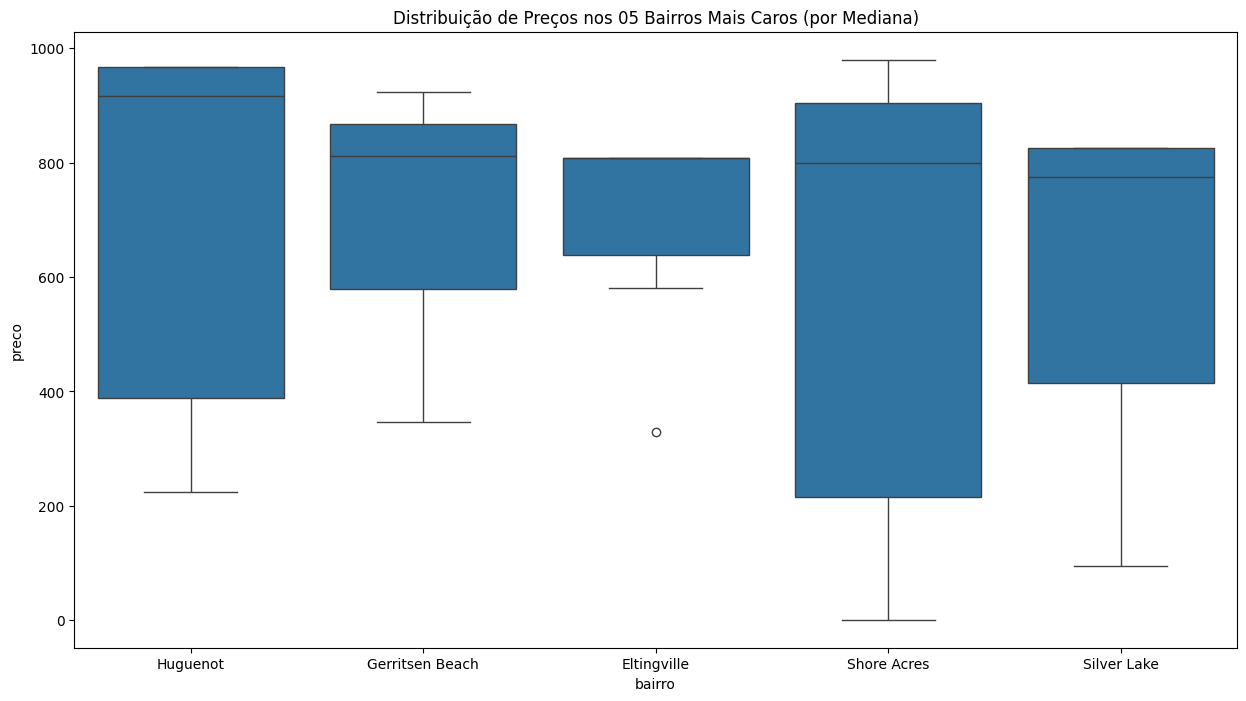

In [43]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_top_05, x='bairro', y='preco', order=bairros_mais_caros_index)
plt.title('Distribuição de Preços nos 05 Bairros Mais Caros (por Mediana)')
plt.show()

Qual o tipo de quarto (room type) mais comum? E o mais caro?

In [15]:
df['tipo_quarto'].value_counts()

,count
tipo_quarto,
Entire home/apt,52670
Private room,45598
Shared room,2184
Hotel room,112


In [16]:
contagem_tipo_quarto = df['tipo_quarto'].value_counts()

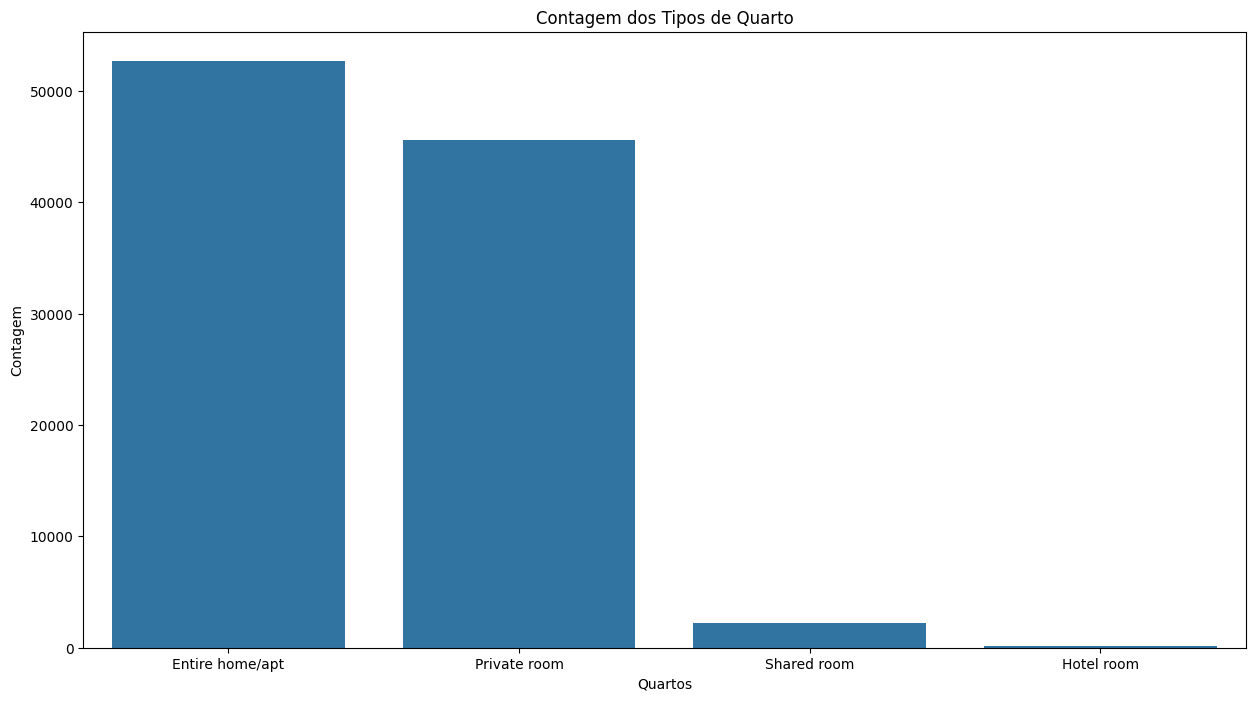

In [17]:
plt.figure(figsize=(15, 8))
sns.barplot(x=contagem_tipo_quarto.index, y=contagem_tipo_quarto.values)
plt.title("Contagem dos Tipos de Quarto")
plt.xlabel("Quartos")
plt.ylabel("Contagem")
plt.show()

In [18]:
contagem_quarto_preco = df.groupby('tipo_quarto')['preco'].median().sort_values(ascending=False)

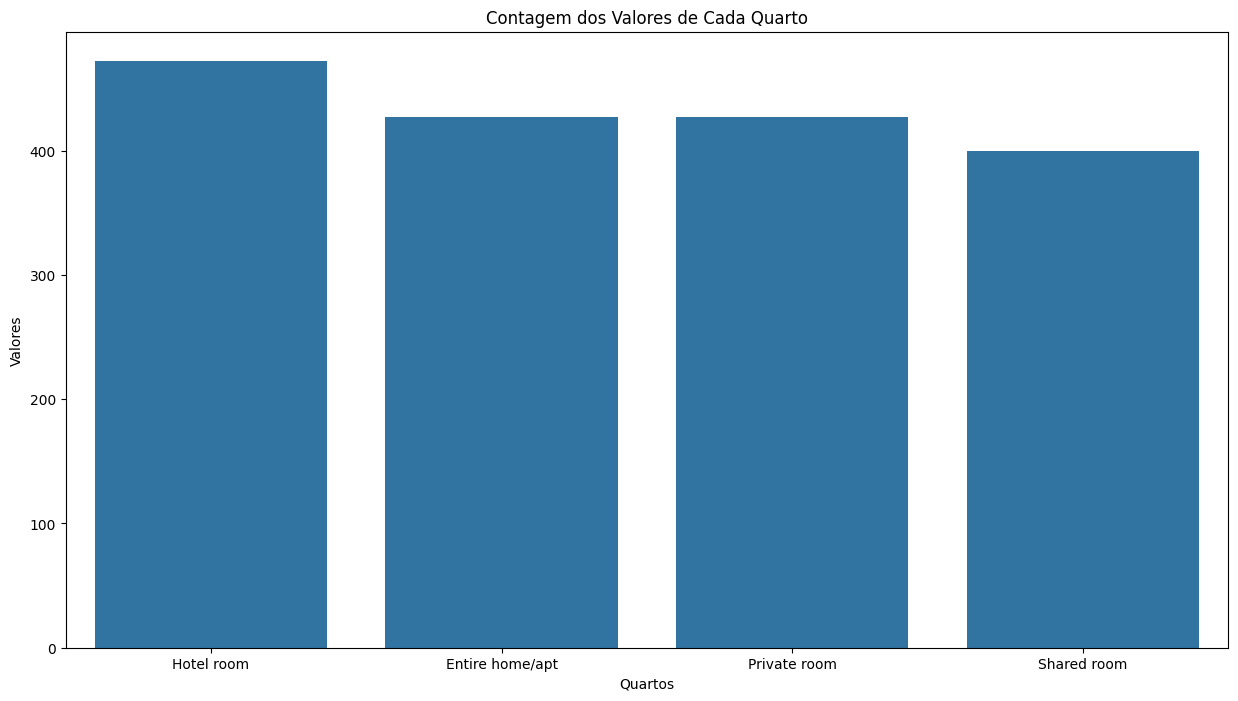

In [19]:
plt.figure(figsize=(15, 8))
sns.barplot(x=contagem_quarto_preco.index, y=contagem_quarto_preco.values)
plt.title("Contagem dos Valores de Cada Quarto")
plt.xlabel("Quartos")
plt.ylabel("Valores")
plt.show()

Existe correlação entre o número de reviews (number of reviews) e o preço?


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100564 entries, 0 to 102598
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   nome_anuncio          100564 non-null  object 
 1   regiao                100564 non-null  object 
 2   bairro                100564 non-null  object 
 3   latitude              100564 non-null  float64
 4   longitude             100564 non-null  float64
 5   tipo_quarto           100564 non-null  object 
 6   ano_construcao        100564 non-null  float64
 7   preco                 100564 non-null  float64
 8   taxa_servico          100564 non-null  object 
 9   minimo_noites         100564 non-null  float64
 10  nota_avaliacao        100564 non-null  float64
 11  disponibilidade_365d  100564 non-null  float64
dtypes: float64(7), object(5)
memory usage: 10.0+ MB


In [30]:
df_values = df.select_dtypes(include='float64')

<Axes: >

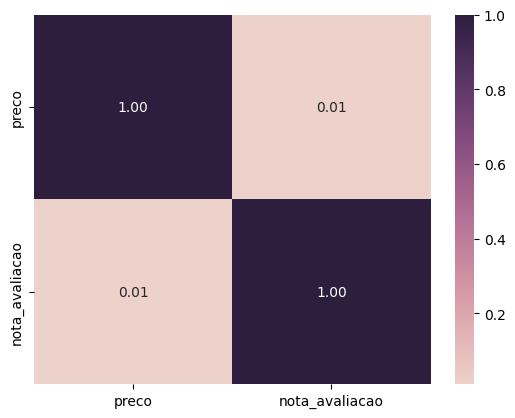

In [55]:
sns.heatmap(df_values[['preco','nota_avaliacao']].corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2f')